<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Immigration-&amp;-Weather-Pipeline---Data-Engineering-Capstone-Project" data-toc-modified-id="Immigration-&amp;-Weather-Pipeline---Data-Engineering-Capstone-Project-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Immigration &amp; Weather Pipeline - Data Engineering Capstone Project</a></span><ul class="toc-item"><li><span><a href="#Project-Summary" data-toc-modified-id="Project-Summary-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Project Summary</a></span></li><li><span><a href="#Step-1:-Scope-the-Project-and-Gather-Data" data-toc-modified-id="Step-1:-Scope-the-Project-and-Gather-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Step 1: Scope the Project and Gather Data</a></span><ul class="toc-item"><li><span><a href="#Scope" data-toc-modified-id="Scope-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Scope</a></span></li><li><span><a href="#Describe-and-Gather-Data" data-toc-modified-id="Describe-and-Gather-Data-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Describe and Gather Data</a></span></li></ul></li><li><span><a href="#Step-2:-Explore-and-Assess-the-Data" data-toc-modified-id="Step-2:-Explore-and-Assess-the-Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Step 2: Explore and Assess the Data</a></span><ul class="toc-item"><li><span><a href="#Explore-the-Data" data-toc-modified-id="Explore-the-Data-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Explore the Data</a></span></li><li><span><a href="#Cleaning-Steps" data-toc-modified-id="Cleaning-Steps-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Cleaning Steps</a></span></li></ul></li><li><span><a href="#Step-3:-Define-the-Data-Model" data-toc-modified-id="Step-3:-Define-the-Data-Model-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Step 3: Define the Data Model</a></span><ul class="toc-item"><li><span><a href="#3.1-Conceptual-Data-Model" data-toc-modified-id="3.1-Conceptual-Data-Model-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>3.1 Conceptual Data Model</a></span></li><li><span><a href="#3.2-Mapping-Out-Data-Pipelines" data-toc-modified-id="3.2-Mapping-Out-Data-Pipelines-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>3.2 Mapping Out Data Pipelines</a></span></li></ul></li><li><span><a href="#Step-4:-Run-Pipelines-to-Model-the-Data" data-toc-modified-id="Step-4:-Run-Pipelines-to-Model-the-Data-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Step 4: Run Pipelines to Model the Data</a></span><ul class="toc-item"><li><span><a href="#4.1-Create-the-data-model" data-toc-modified-id="4.1-Create-the-data-model-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>4.1 Create the data model</a></span></li><li><span><a href="#4.2-Data-Quality-Checks" data-toc-modified-id="4.2-Data-Quality-Checks-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>4.2 Data Quality Checks</a></span></li><li><span><a href="#4.3-Data-dictionary" data-toc-modified-id="4.3-Data-dictionary-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>4.3 Data dictionary</a></span></li></ul></li><li><span><a href="#Step-5:-Complete-Project-Write-Up" data-toc-modified-id="Step-5:-Complete-Project-Write-Up-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Step 5: Complete Project Write Up</a></span></li></ul></li></ul></div>

# Immigration & Weather Pipeline - Data Engineering Capstone Project

## Project Summary

--describe your project at a high level--

The project follows the follow steps:
* Step 1: Scope the Project and Gather Data
* Step 2: Explore and Assess the Data
* Step 3: Define the Data Model
* Step 4: Run ETL to Model the Data
* Step 5: Complete Project Write Up

In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from pyspark.sql import SparkSession, SQLContext, GroupedData
from pyspark.sql.functions import *

In [2]:
# Build the Spark session
spark = SparkSession.builder.\
config('spark.jars.packages','saurfang:spark-sas7bdat:2.0.0-s_2.11').enableHiveSupport().getOrCreate()

## Step 1: Scope the Project and Gather Data

### Scope 
Explain what you plan to do in the project in more detail. What data do you use? What is your end solution look like? What tools did you use? etc>

We will create an ETL pipeline for the [I94 immigration dataset](https://travel.trade.gov/research/reports/i94/historical/2016.html) and world temperature dataset from [Kaggle](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data). This will analyst to explore the data to determine if immigration is affected by the destination's temperature.

### Describe and Gather Data 
Describe the data sets you're using. Where did it come from? What type of information is included? 

[I94 immigration dataset](https://travel.trade.gov/research/reports/i94/historical/2016.html) was retrieved from from the US National Tourism and Trade Office's site: https://travel.trade.gov/research/reports/i94/historical/2016.html. The data are broken down into files by month. Below are some relevant information contained in the data for this particular project:

* `i94yr`: Year (4 digit number)
* `i94mon`: Month as numerical value (1 or 2 digit number)
* `i94cit`: Reference code of the city of origin (3 digit number)
* `i94port`: Reference code of destination city airport (3 characters)
* `arrdate`: Arrival date (SAS Date)
* `depdate`: Departure date (SAS Date)
* `i94visa`: Reason for immigration

[World temperature dataset](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data) was retrieved from Kaggle: https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data. The data are broken into separate files for different coarseness of areas (e.g. countries vs cities) but we'll specifically only look at cities. The file then specifies some of the following:

* `dt`: Datetime of when temperature was recorded (YYYY-MM-DD)
* `AverageTemperature`:  Average temperature in Celcius of area
* `City`:  Name of city where temperature was recorded
* `Country`:  Name of country where temperature was recorded
* `Latitude`: Latitude of city
* `Longitude`:  Longitude of city

## Step 2: Explore and Assess the Data

### Explore the Data 
Identify data quality issues, like missing values, duplicate data, etc.

#### i94 Imigration Data

Let's start with the label description file to get an idea of what can be seen. It's formatted in such a way that we can parse though it to get just the column and its relevant description

In [3]:
sas_label_description_file = '../../../data/I94_SAS_Labels_Descriptions.SAS'

with open(sas_label_description_file) as f:
    lines = f.readlines()    

In [4]:
descriptions = [line for line in lines if '/*' in line and '*/\n' in line]
regex_code_description = re.compile(r'^/\*\s+(?P<code>.+?)\s+-\s+(?P<description>.+)\s+\*/$')
matches = [regex_code_description.match(description) for description in descriptions]

for match in matches:
    print(f'''
    {match.group("code")}:
        {match.group('description')}
    ''', end='')


    I94YR:
        4 digit year
    
    I94MON:
        Numeric month
    
    I94CIT & I94RES:
        This format shows all the valid and invalid codes for processing
    
    I94PORT:
        This format shows all the valid and invalid codes for processing
    
    I94MODE:
        There are missing values as well as not reported (9)
    
    I94BIR:
        Age of Respondent in Years
    
    COUNT:
        Used for summary statistics
    
    DTADFILE:
        Character Date Field - Date added to I-94 Files - CIC does not use
    
    VISAPOST:
        Department of State where where Visa was issued - CIC does not use
    
    OCCUP:
        Occupation that will be performed in U.S. - CIC does not use
    
    ENTDEPA:
        Arrival Flag - admitted or paroled into the U.S. - CIC does not use
    
    ENTDEPD:
        Departure Flag - Departed, lost I-94 or is deceased - CIC does not use
    
    ENTDEPU:
        Update Flag - Either apprehended, overstayed, adjusted to perm re

We're particularly interested in the `I94PORT` since we'll cross reference this across the two sources.

In [5]:
reg_abbrv_name = re.compile(r'\'(.*)\'.*\'(.*)\'')
defined_ports = {}

# Line after ports definition where ports are displayed
for line in lines[302:961]:
    match = reg_abbrv_name.search(line)
    # Save 3 characted code → full name of port
    defined_ports[match.group(1)]=match.group(2).strip()

In [6]:
sas_data_dir = '../../../data/18-83510-I94-Data-2016'
# Get all files in the data directory
sas_filenames = [f'{sas_data_dir}/{filename}' for filename in os.listdir(sas_data_dir)]
sas_header_file = f'{sas_data_dir}/I94_SAS_Labels_Descriptions.SAS'


In [7]:
df_i94_spark = spark.read.format('com.github.saurfang.sas.spark').load(sas_filenames[0])


In [8]:
df_i94_spark.show(5)

+-----+------+------+------+------+-------+-------+-------+-------+-------+------+-------+-----+--------+--------+-----+-------+-------+-------+-------+-------+--------+------+------+-------+--------------+-----+--------+
|cicid| i94yr|i94mon|i94cit|i94res|i94port|arrdate|i94mode|i94addr|depdate|i94bir|i94visa|count|dtadfile|visapost|occup|entdepa|entdepd|entdepu|matflag|biryear| dtaddto|gender|insnum|airline|        admnum|fltno|visatype|
+-----+------+------+------+------+-------+-------+-------+-------+-------+------+-------+-----+--------+--------+-----+-------+-------+-------+-------+-------+--------+------+------+-------+--------------+-----+--------+
|  6.0|2016.0|   4.0| 692.0| 692.0|    XXX|20573.0|   null|   null|   null|  37.0|    2.0|  1.0|    null|    null| null|      T|   null|      U|   null| 1979.0|10282016|  null|  null|   null| 1.897628485E9| null|      B2|
|  7.0|2016.0|   4.0| 254.0| 276.0|    ATL|20551.0|    1.0|     AL|   null|  25.0|    3.0|  1.0|20130811|     SE

To more easily explore the data, we'll load a Pandas DataFrame instead of Spark (though we'll use Spark later since it scales well).

In [9]:
def read_as_pd_df(filepath, chunksize=20000, formatting='sas7bdat', encoding='ISO-8859-1'):
    '''
    Returns a Pandas DataFrame from a SAS formatted file with an option to read in the first chunk.
    
    Args:
        filepath:   Path to SAS file.
        chunksize:  The first n-lines to read in as a chunk. Can be `None` if whole file should be read.
        formatting: Format of file.
        encoding:   Encoding of file.
    
    Returns:
        Pandas DataFrame of the SAS file.
    
    '''
    # If a defined chunksize, just get the first chunk (size of chunksize)
    if chunksize:
        df_pandas = next(pd.read_sas(filepath, format=formatting, encoding=encoding, chunksize=chunksize))
    # Executes if None (use the whole dataframe)
    else:
        # Note this can take some time as it's really big dataframe but it'd get the whole dataframe as a pandas 
        df_pandas = pd.read_sas(filepath, format=formatting, encoding=encoding, chunksize=None)
        
    return df_pandas

In [10]:
# Only getting a chunk of the file to explore
df_i94_pandas = read_as_pd_df(sas_filenames[0], chunksize=500000)

In [11]:
df_i94_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 28 columns):
cicid       500000 non-null float64
i94yr       500000 non-null float64
i94mon      500000 non-null float64
i94cit      500000 non-null float64
i94res      500000 non-null float64
i94port     500000 non-null object
arrdate     500000 non-null float64
i94mode     499999 non-null float64
i94addr     481570 non-null object
depdate     481368 non-null float64
i94bir      500000 non-null float64
i94visa     500000 non-null float64
count       500000 non-null float64
dtadfile    499999 non-null object
visapost    185656 non-null object
occup       2121 non-null object
entdepa     500000 non-null object
entdepd     481368 non-null object
entdepu     60 non-null object
matflag     481368 non-null object
biryear     500000 non-null float64
dtaddto     499984 non-null object
gender      429964 non-null object
insnum      0 non-null object
airline     499998 non-null object
admnum      5

We can observe some relevant columns that we'd like to investigate. We also notice that certain columns have many missing values.

array([  37.,   25.,   55.,   28.,    4.,   57.,   63.,   46.,   48.,
         52.,   33.,   58.,   56.,   62.,   49.,   43.,   53.,   74.,
         65.,   35.,   32.,   38.,   68.,   61.,   41.,   45.,   54.,
         29.,   42.,   34.,   47.,   64.,   27.,   59.,   60.,   66.,
         51.,   22.,   39.,   20.,   50.,   44.,   40.,   31.,   23.,
         36.,    2.,    0.,   70.,   26.,   30.,   16.,   14.,   21.,
         24.,    1.,   77.,   73.,   71.,    6.,   72.,    5.,   76.,
         69.,   67.,    3.,   10.,   18.,   19.,   11.,   17.,    9.,
          8.,   12.,   75.,    7.,   13.,   15.,   82.,   84.,   78.,
         81.,   87.,   79.,   80.,   83.,   91.,   85.,   86.,   88.,
         90.,   89.,   97.,   96.,   93.,   92.,  100.,   95.,   98.,
         94.,   99.])

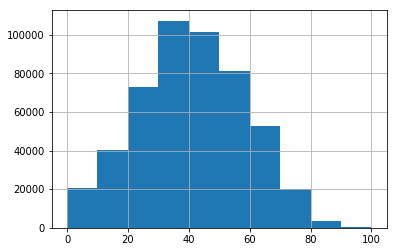

In [12]:
display(df_i94_pandas['i94bir'].unique())
df_i94_pandas['i94bir'].hist()

We see ages seem reasonable and shouldn't be too concerning. But we remember that we are chunking the file, so we'll only keep rows that are defined from 0 to 100 years old.

In [13]:
df_i94_pandas['i94port'].unique()

array(['XXX', 'ATL', 'WAS', 'NYC', 'TOR', 'BOS', 'HOU', 'MIA', 'CHI',
       'LOS', 'CLT', 'DEN', 'DAL', 'DET', 'NEW', 'FTL', 'LVG', 'ORL',
       'NOL', 'PIT', 'SFR', 'SPM', 'POO', 'PHI', 'SEA', 'SLC', 'TAM',
       'HAM', 'NAS', 'VCV', 'MAA', 'AUS', 'HHW', 'OGG', 'PHO', 'SDP',
       'SFB', 'EDA', 'MON', 'CLG', 'DUB', 'FMY', 'YGF', 'SAJ', 'CIN',
       'BAL', 'RDU', 'WPB', 'STT', 'OAK', 'NSV', 'SNA', 'OTT', 'X96',
       '5KE', 'CLE', 'HAR', 'PSP', 'CHR', 'HAL', 'SAA', 'KOA', 'SHA',
       'WIN', 'BGM', 'NCA', 'OPF', 'SAI', 'JFA', 'AGA', 'ONT', 'CLM',
       'STL', 'W55', 'CHS', 'SNJ', 'SRQ', 'ANC', 'LNB', 'LIH', 'MIL',
       'INP', 'KAN', 'ROC', 'SAC', 'BRO', 'LAR', 'RNO', 'SGR', 'ELP',
       'MCA', 'MDT', 'SPE', 'FPR', 'SYR', 'ICT', 'MLB', 'ADS', 'TUC',
       'DLR', 'CAE', 'CHA', 'HSV', 'WIL', 'HPN', 'HEF', 'BRG', 'BED',
       'DAB', 'JAC', 'FRB', 'SWF', 'KEY', 'PTK', 'MWH', 'X44', 'MYR',
       'APF', 'ATW', 'PVD', 'BUF'], dtype=object)

We note that the value `XXX` is unknow as specified in the data header.

We also note that the dates from the Spark DataFrame, the date formatted values were in SAS format. We'll have to convert those.

#### Temperature data set

In [14]:
df_temp = pd.read_csv('data/GlobalLandTemperaturesByCity.csv')

In [15]:
df_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [16]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
dt                               object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                             object
Country                          object
Latitude                         object
Longitude                        object
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


We'll likely want to keep all these columns (except `AverageTemperatureUncertainty`) though we note some rows are likely irrelevant to us such as cities that are not defined as ports in the i94 dataset.

We also want to remove any missing temperature rows and duplicate rows (since we can't use that information effectively in this case).

In [17]:
df_temp.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


We observe that minimum and maximum average temperatures range from about $-43^\circ$ to $40^\circ$ Celcius. Nothing seems out of the range of what's possible for the world so not much to change.

### Cleaning Steps
Document steps necessary to clean the data

In [18]:
def clean_i94(i94_spark_df):
        '''
        Cleans i94 Spark dataframe with readable column names and proper date
        and value formats.
        
        Args:
            i94_spark_df: Spark dataframe of data from i94 dataset.
        
        Returns:
            Cleaned Spark dataframe of data from i94 dataset
        '''
        # Format dates
        i94_spark_df_dates = (i94_spark_df
                                .withColumn('arrival_year', col('i94yr').cast('integer'))
                                .withColumn('arrival_month', col('i94mon').cast('integer'))
                                .withColumn('data_base_sas', to_date(lit('01/01/1960'), 'MM/dd/yyyy'))
                                .withColumn('arrival_date', expr('date_add(data_base_sas, arrdate)'))
                                .withColumn('departure_date', expr('date_add(data_base_sas, depdate)'))
                                .drop('arrdate', 'depdate')
        )
        
        # Rename columns and set integer values
        i94_spark_df_clean = (i94_spark_df_dates
                                .withColumn('arrival_port', col('i94port'))                              
                                .withColumn('departure_city', col('i94cit').cast('integer'))
                                .withColumn('mode_of_travel', col('i94mode').cast('integer'))
                                .withColumn('city_of_origin', col('i94cit').cast('integer'))
                                .withColumn('country_of_origin', col('i94res').cast('integer'))
                                .withColumn('age', col('i94bir').cast('integer'))
                                .withColumn('visa_type', col('i94visa').cast('integer'))            
        )
        
        # Final selection of data and order
        i94_spark_df_final = i94_spark_df_clean.select(
                    col('arrival_date'),
                    col('departure_date'),
                    col('arrival_port'),
                    col('city_of_origin'),
                    col('country_of_origin'),
                    col('mode_of_travel'),
                    col('age'),
                    col('visa_type')
                )
        
        return i94_spark_df_final
    

In [19]:
df_i94_clean = clean_i94(df_i94_spark)
df_i94_clean.show(5)

+------------+--------------+------------+--------------+-----------------+--------------+---+---------+
|arrival_date|departure_date|arrival_port|city_of_origin|country_of_origin|mode_of_travel|age|visa_type|
+------------+--------------+------------+--------------+-----------------+--------------+---+---------+
|  2016-04-29|          null|         XXX|           692|              692|          null| 37|        2|
|  2016-04-07|          null|         ATL|           254|              276|             1| 25|        3|
|  2016-04-01|    2016-08-25|         WAS|           101|              101|             1| 55|        2|
|  2016-04-01|    2016-04-23|         NYC|           101|              101|             1| 28|        2|
|  2016-04-01|    2016-04-23|         NYC|           101|              101|             1|  4|        2|
+------------+--------------+------------+--------------+-----------------+--------------+---+---------+
only showing top 5 rows



In [20]:
@udf()
def city_to_port(city_name):
    '''
    Check city name against defined ports and return the used port abbreviation.
    
    Args:
        city_name: Name of city.
    
    Returns:
        Abbreviation if found otherwise nothing will return (None).
    '''
    for abbrv,port_name in defined_ports.values():
        # Checking if city is contained in the official city port name from i94 data
        if city_name.lower() in port_name.lower():
            return abbrv

def clean_temp_data(df):
    '''
    Returns a clean temperature Spark DataFrame.
    '''
    new_df = df.filter(df['AverageTemperature'] != 'NaN').dropDuplicates(['City', 'Country'])
    new_df = new_df.withColumn('port', city_to_port(new_df['City']))
    new_df = new_df.filter(new_df['port'] != 'null')
    
    return new_df

In [21]:
temp_df_spark = spark.read.format("csv").option("header", "true").load('data/GlobalLandTemperaturesByCity.csv')

In [22]:
temp_df_spark_clean = clean_temp_data(temp_df_spark)

## Step 3: Define the Data Model

### 3.1 Conceptual Data Model
Map out the conceptual data model and explain why you chose that model

#### Fact Table

`fact_immigration` gives us the main facts that can be used for queries. Below are the columns in the fact table:

* `arrival_date`: Arrival date of immigrant 
* `departure_date`: Departure date of immigrant
* `arrival_port`:  Arrival port (3 character code)
* `city_of_origin`: City immigrated from (2 digit code)
* `country_of_origin`: Country immigrated from
* `mode_of_travel`: How immigration occurred (1 digit code or null)
* `age`: Age of immigrant (years old)
* `visa_type`: Visa code (1 digit: Business/Pleasure/Student)
* `AveargeTemperature`: Average temperature of city

#### Dimension Tables

`dim_immigration` provides some of the relevant information from the i94 dataste.

Columns:
* `arrival_date`: Arrival date of immigrant 
* `departure_date`: Departure date of immigrant
* `arrival_port`:  Arrival port (3 character code)
* `city_of_origin`: City immigrated from (2 digit code)
* `country_of_origin`: Country immigrated from
* `mode_of_travel`: How immigration occurred (1 digit code or null)
* `age`: Age of immigrant (years old)
* `visa_type`: Visa code (1 digit: Business/Pleasure/Student)

`dim_temperature` provides the columns from the global temperature dataset.

Columns:
* `port`: i94 code of port for city
* `City`: Name of city
* `Country`: Name of city's country
* `AverageTemperature`: Average temperature of city
* `Latitude`: Latitude of city
* `Longitude` Longitude of city

### 3.2 Mapping Out Data Pipelines
List the steps necessary to pipeline the data into the chosen data model

1. Data processing/cleaning
2. Create the dimension table from i94 dataset
3. Create the dimension table from global temperature dataset
4. Create fact table from dimension tables by joining on the arrival port of `dim_immigration` and the port for `dim_temperature`
5. Write to parquet file partitioned by the port

## Step 4: Run Pipelines to Model the Data 

### 4.1 Create the data model
Build the data pipelines to create the data model.

### 4.2 Data Quality Checks
Explain the data quality checks you'll perform to ensure the pipeline ran as expected. These could include:
 * Integrity constraints on the relational database (e.g., unique key, data type, etc.)
 * Unit tests for the scripts to ensure they are doing the right thing
 * Source/Count checks to ensure completeness
 
Run Quality Checks

In [24]:
# Perform quality checks here

### 4.3 Data dictionary 
Create a data dictionary for your data model. For each field, provide a brief description of what the data is and where it came from. You can include the data dictionary in the notebook or in a separate file.

## Step 5: Complete Project Write Up
* Clearly state the rationale for the choice of tools and technologies for the project.
* Propose how often the data should be updated and why.
* Write a description of how you would approach the problem differently under the following scenarios:
 * The data was increased by 100x.
 * The data populates a dashboard that must be updated on a daily basis by 7am every day.
 * The database needed to be accessed by 100+ people.